In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 

In [3]:
#importing the dataset
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris = np.append(iris.data, iris.target.reshape(150,1), axis=1)
iris = pd.DataFrame(iris, columns = ['sepal length (cm)', 'sepal width (cm)', 
                                     'petal length (cm)', 'petal width (cm)', 'Iris class'])
iris.replace({'Iris class' : {0: 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'}},
             inplace = True)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
iris.shape

(150, 5)

In [8]:
iris['Iris class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Iris class, dtype: int64

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Iris class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#missing values
null_val_count = iris.isnull().sum()
null_val_count

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Iris class           0
dtype: int64

In [11]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#number of unique values
iris.nunique(axis=0)

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
Iris class            3
dtype: int64

In [13]:
iris['Iris class'] = LabelEncoder().fit_transform(iris['Iris class']) 
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [15]:
for columnIndex in range(iris.shape[1]-1):
    min_max = preprocessing.MinMaxScaler()
    iris[iris.columns[columnIndex]] = min_max.fit_transform(iris[[iris.columns[columnIndex]]])

In [16]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [17]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris class
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2
149,0.444444,0.416667,0.694915,0.708333,2


In [26]:
#input features
X = iris[['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)']]
print(X)
#target feature
y = iris[['Iris class']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

#implementing logistic regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             0.222222          0.625000           0.067797          0.041667
1             0.166667          0.416667           0.067797          0.041667
2             0.111111          0.500000           0.050847          0.041667
3             0.083333          0.458333           0.084746          0.041667
4             0.194444          0.666667           0.067797          0.041667
..                 ...               ...                ...               ...
145           0.666667          0.416667           0.711864          0.916667
146           0.555556          0.208333           0.677966          0.750000
147           0.611111          0.416667           0.711864          0.791667
148           0.527778          0.583333           0.745763          0.916667
149           0.444444          0.416667           0.694915          0.708333

[150 rows x 4 columns]


C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# Evaluation metrics for the model
#Accuracy - percentage of correct classifications
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.9666666666666667


In [ ]:
#Confusion Matrix - helps in determining how a classifier performs
import pandas as pd
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred)
confmat

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

Text(69.0, 0.5, 'Truth')

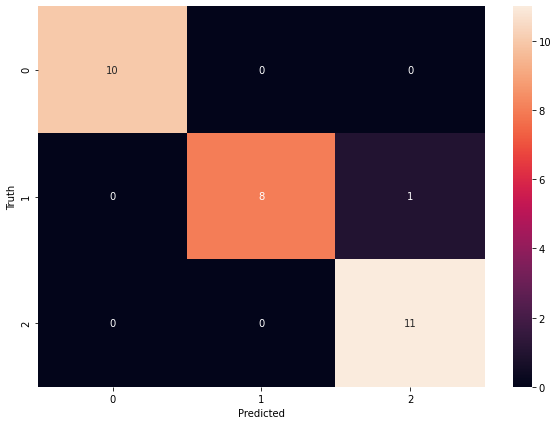

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(confmat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
#0 - Iris-setosa, 1 - Iris-versicolor, 2 - Iris-viriginica

In [ ]:
#classification report - shows f1 score, precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

